In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


In [2]:
# 1.  Load and check data
# 1.1 load data
# 1.2 Outlier detection
# 1.3 joining train and test set
# 1.4 check for null and missing values

In [3]:
telco_customer_churn_dataset=pd.read_csv("Telco-Customer-Churn.csv")

In [4]:
deep_copy_explanation='''
Shallow copy shares data and index with original.
Deep copy has own copy of data and index.
any Updates to the data shared by shallow copy and original is reflected in both; deep copy remains unchanged.
 s = pd.Series([1, 2], index=["a", "b"])
 deep = s.copy()
 shallow = s.copy(deep=False)

 s[0] = 3
 shallow[1] = 4
 s
 a    3
 b    4
 dtype: int64
 shallow
 a    3
 b    4
 dtype: int64
 deep
 a    1
 b    2
 dtype: int64
 
Updating a nested data object will be reflected in the deep copy

s = pd.Series([[1, 2], [3, 4]])
deep = s.copy()
s[0][0] = 10
s
0    [10, 2]
1     [3, 4]
dtype: object
deep
0    [10, 2]
1     [3, 4]
dtype: object
'''

In [5]:
telco_customer_churn_dataset_copy=telco_customer_churn_dataset.copy(deep=True)

In [6]:
telco_customer_churn_dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


here we found that the TotalCharges column of the dataset must be of type float64 but it is of type object
so correcting it first


In [7]:
telco_customer_churn_dataset_copy['TotalCharges']=pd.to_numeric(telco_customer_churn_dataset_copy['TotalCharges'],errors='coerce',downcast="float")

In [8]:
telco_customer_churn_dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
telco_customer_churn_dataset_copy['TotalCharges'].fillna(telco_customer_churn_dataset_copy['TotalCharges'].median(), inplace = True)

In [10]:
# the above statement helps to identify that there are 
#1 float type object, 2 integer type object and 18 character type object  
# also there are no column hving null value 
# there are 20 column
# there are 7043 rows


In [11]:
# examining each column annd its outlier
telco_customer_churn_dataset_copy['TotalCharges'].isnull().sum()


0

In [12]:
column_name_list=telco_customer_churn_dataset_copy.columns.to_list()

In [13]:
column_info={i:telco_customer_churn_dataset_copy[i].unique() for i in column_name_list}

In [14]:
column_info

{'customerID': array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
        '8361-LTMKD', '3186-AJIEK'], dtype=object),
 'gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array([0, 1]),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'tenure': array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
        21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
         9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
        36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
        54, 51, 26,  0, 39]),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBackup': array(['Yes', 'No', 'No internet service'], 

 Feature analysis
 1. Numerical values
 2. Categorical values

 Numerical values

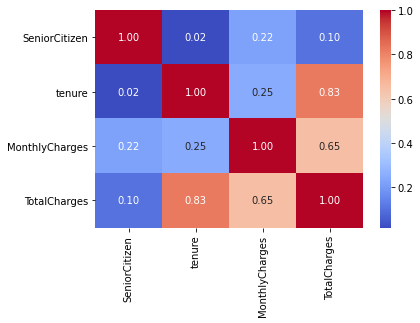

In [15]:
g = sns.heatmap(telco_customer_churn_dataset_copy[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

from here we found that tenure and monthly charges, senior citizen and monthly charges seems to have a significative correlation

since column customer_ID contains 7043 unique element we can drop it as it has no effect on prediction


In [16]:
telco_customer_churn_dataset_copy.drop(labels=['customerID'], axis = 1,inplace=True)


In [17]:
column_name_list=telco_customer_churn_dataset_copy.columns.to_list()


In [18]:
for i in column_name_list:
    if telco_customer_churn_dataset_copy[i].dtype=='object' and len(telco_customer_churn_dataset_copy[i].unique())>2:
        print(len(telco_customer_churn_dataset_copy[i].unique()),i)
        telco_customer_churn_dataset_copy = pd.get_dummies(telco_customer_churn_dataset_copy, columns = [i],prefix=i)

    

3 MultipleLines
3 InternetService
3 OnlineSecurity
3 OnlineBackup
3 DeviceProtection
3 TechSupport
3 StreamingTV
3 StreamingMovies
3 Contract
4 PaymentMethod


In [19]:
column_name_list=telco_customer_churn_dataset_copy.columns.to_list()
telco_customer_churn_dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   object 
 3   Dependents                               7043 non-null   object 
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   object 
 6   PaperlessBilling                         7043 non-null   object 
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float32
 9   Churn                                    7043 non-null   object 
 10  MultipleLines_No                         7043 no

In [20]:
for i in column_name_list:
    if telco_customer_churn_dataset_copy[i].dtype=='object' and len(telco_customer_churn_dataset_copy[i].unique())==2:
        telco_customer_churn_dataset_copy[i] = LabelEncoder().fit_transform(telco_customer_churn_dataset_copy[i])

    

In [21]:
column_name_list=telco_customer_churn_dataset_copy.columns.to_list()
telco_customer_churn_dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float32
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines_No                         7043 no

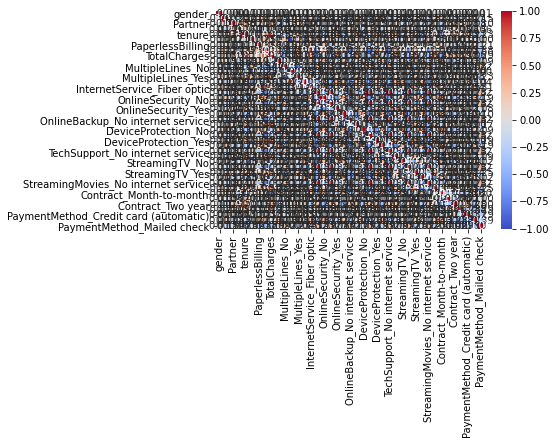

In [22]:
g = sns.heatmap(telco_customer_churn_dataset_copy[column_name_list].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [23]:
column_name_list.remove('Churn')
column_name_list

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mail

In [24]:
telco_customer_churn_dataset_copy['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [26]:
y = telco_customer_churn_dataset_copy['Churn']
X = telco_customer_churn_dataset_copy.drop('Churn', axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float32
 9   MultipleLines_No                         7043 non-null   uint8  
 10  MultipleLines_No phone service           7043 no

In [ ]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%


#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = y

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
   

    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X,y, cv  = cv_split,return_train_score=True,return_estimator=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    #alg.fit(X, y)
    #MLA_predict[MLA_name] = alg.predict(X)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict



ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6)
